In [2]:
import pandas as pd
from utils import pca_utils, utils, pca_utils, plots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_props = pd.read_csv('./output/df_props.csv')

df_authors = pd.read_csv('./output/df_authors.csv')
df_authors['id_dep'] = df_authors['uri'].apply(lambda x: str(x).split('/')[-1])

# Distribuição de proposições por tema

In [4]:
df_props[['id', 'siglaTipo']].groupby('siglaTipo').count()

,id
siglaTipo,
AA,1777
ADD,1
APJ,8
APM,1
ATA,581
...,...
SPP,45
SSP,222
SUG,175


In [ ]:
df_freq_types = (
    df_props[['id', 'siglaTipo']].groupby('siglaTipo').count()
    .rename({'id':"freq"}, axis=1)
    .sort_values('freq', ascending=False)
)

df_freq_types['cum_sum'] = df_freq_types['freq'].cumsum()
df_freq_types['cum_perc'] = (df_freq_types['cum_sum'] / df_freq_types['freq'].sum()) * 100

C:\Users\caca_\AppData\Local\Temp\ipykernel_1904\3338811310.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


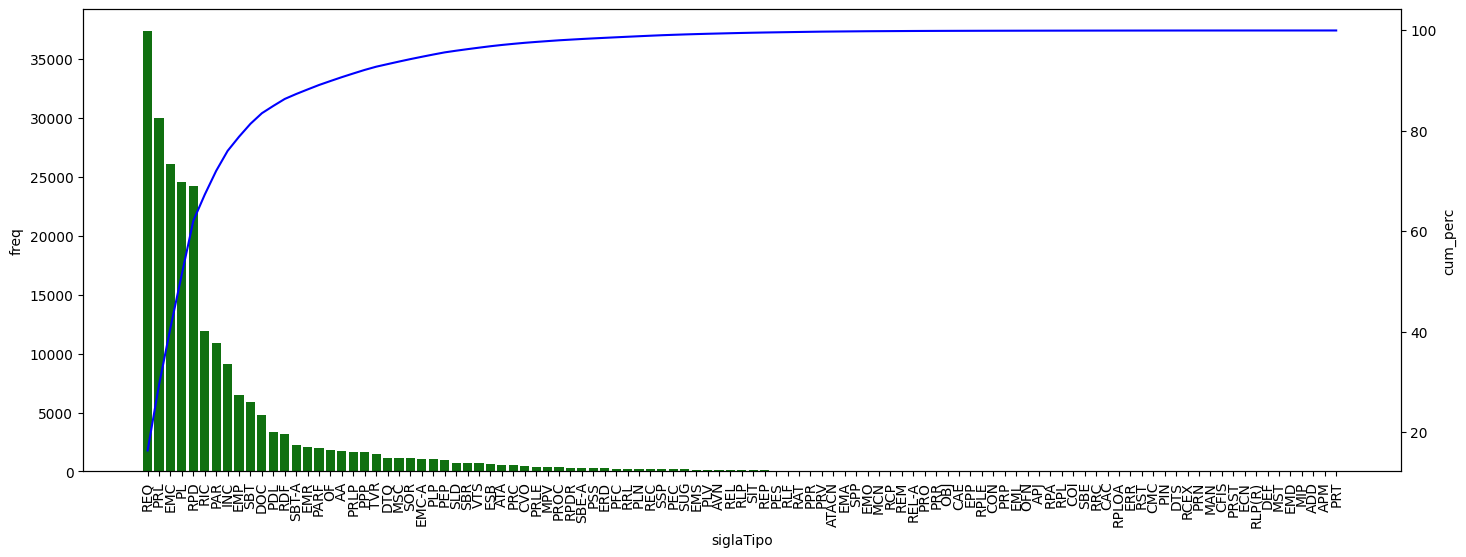

In [ ]:
plt.figure(figsize=(17, 6))  
plot = sns.barplot(data=df_freq_types.freq, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_freq_types.cum_perc, color="b", ax=ax2)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

# Distribuição de temas por deputado

In [3]:
df_authors_generic = (
    df_authors[["id_prop", "id_dep"]]
    .join(pd.get_dummies(df_props["siglaTipo"]), how='inner')
    .loc[:, "id_dep":]
    .groupby("id_dep")
    .sum()
    .reset_index()
)
df_authors['id_prop'] = df_authors['id_prop'].astype(int)

df_authors_generic.set_index('id_dep', inplace=True)

df_authors_generic = df_authors_generic.astype(int)

In [18]:
df_authors_generic.describe()

,AA,ADD,APJ,APM,ATA,ATACN,AVN,CAC,CAE,CFIS,...,SBT,SBT-A,SIT,SLD,SOR,SPP,SSP,SUG,TVR,VTS
count,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,...,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.000000,834.00000,834.000000
mean,2.130695,0.001199,0.009592,0.001199,0.696643,0.058753,0.153477,0.007194,0.017986,0.002398,...,7.082734,2.705036,0.133094,0.911271,1.350120,0.053957,0.266187,0.209832,1.75060,0.811751
std,3.161282,0.034627,0.097528,0.034627,1.514337,0.235303,0.465309,0.084564,0.132979,0.048941,...,9.121646,3.749580,0.395392,1.869524,2.893833,0.236450,0.601026,0.565388,2.45197,1.263318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.750000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.00000,1.000000
max,47.000000,1.000000,1.000000,1.000000,20.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,89.000000,33.000000,3.000000,27.000000,33.000000,2.000000,5.000000,6.000000,32.00000,9.000000


## Boxplot quantidade de proposições por parlamentar

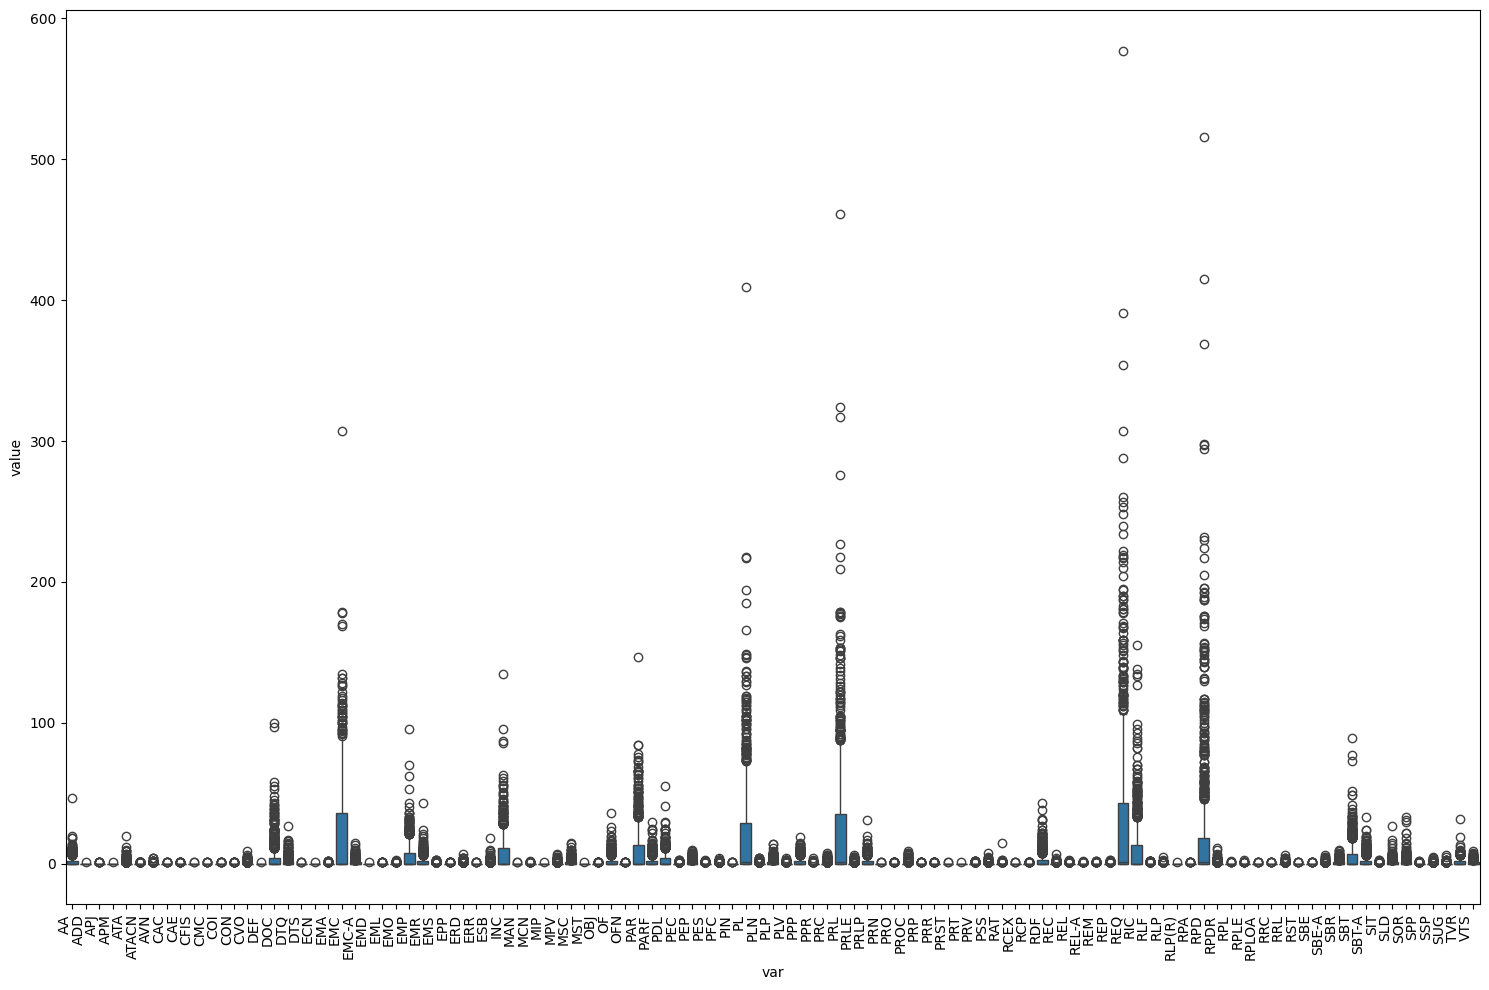

In [53]:
df_melted = df_authors_generic.reset_index().melt(
    id_vars=["id_dep"],  # Keep these as identifier columns
    value_vars=df_authors_generic.columns,
    var_name="var",
    value_name="value",
)

df_melted["value"] = df_melted["value"].astype(float)

plt.figure(figsize=(15, 10))#figsize=figsize

# Create the Seaborn boxplot
sns.boxplot(data=df_melted, x="var", y="value") #[df_melted['value'] > 10]

# Optional: Adjust layout for better readability (especially with many boxes)
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

# Matriz de correlação

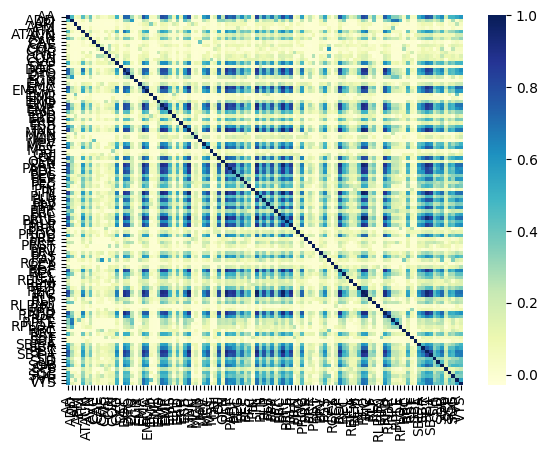

In [54]:
plots.plotar_matriz_corr(df_authors_generic)

# PCA

In [4]:
X = np.matrix(df_authors_generic).astype(float)
# X_LOG = np.asarray(np.log(X +1 ))

S = np.cov(np.transpose(X))

X = np.asarray(X)

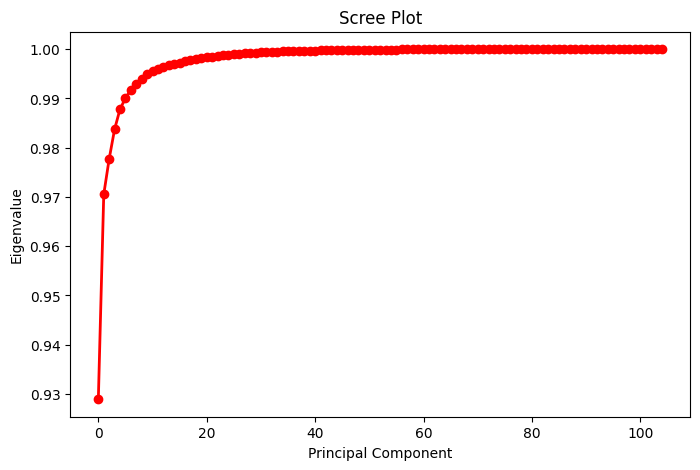

In [5]:
pca, df_pca = pca_utils.calcular_pca(X, n_components=len(df_authors_generic.columns))
plots.plotar_scree_plot(pca.explained_variance_ratio_)

In [5]:
n_components = 4
pca, df_pca = pca_utils.calcular_pca(X, n_components=n_components)

df_pca.set_index(df_authors_generic.index, inplace=True)

df_pca.columns = [f"PCA_TIPOS_{c}" for c in df_pca.columns]

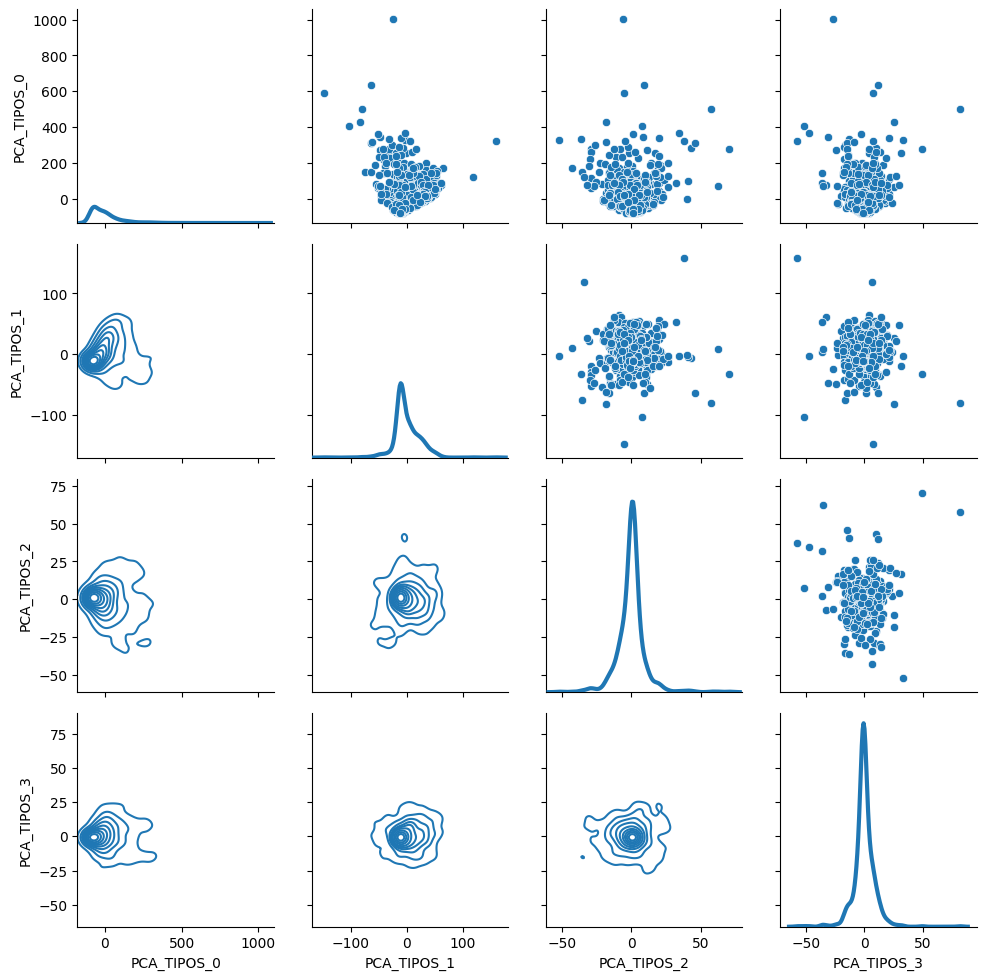

In [13]:
g = sns.PairGrid(df_pca)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

### Cargas vetoriais

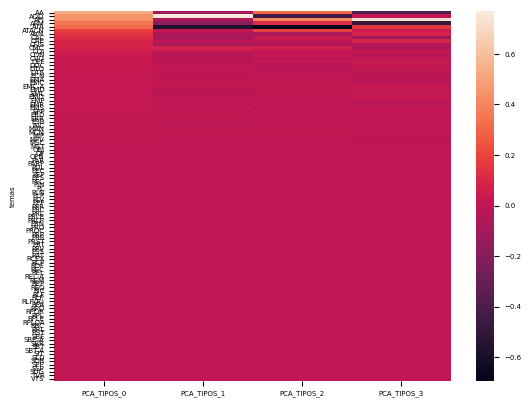

In [91]:
df_cargas = pd.DataFrame()
df_cargas["temas"] = df_authors_generic.columns

prefix = "PCA_TIPOS_"
df_cargas = pca_utils.calcular_cargas_fatoriais(pca, df_cargas, prefix=prefix)

df_cargas.set_index("temas", inplace=True)

sns.heatmap(
    df_cargas,
    yticklabels=df_authors_generic.columns,
    xticklabels=df_cargas.columns,
)

plt.show()

#### Biplots

In [96]:
plt.rcParams.update({'font.size': 10})  

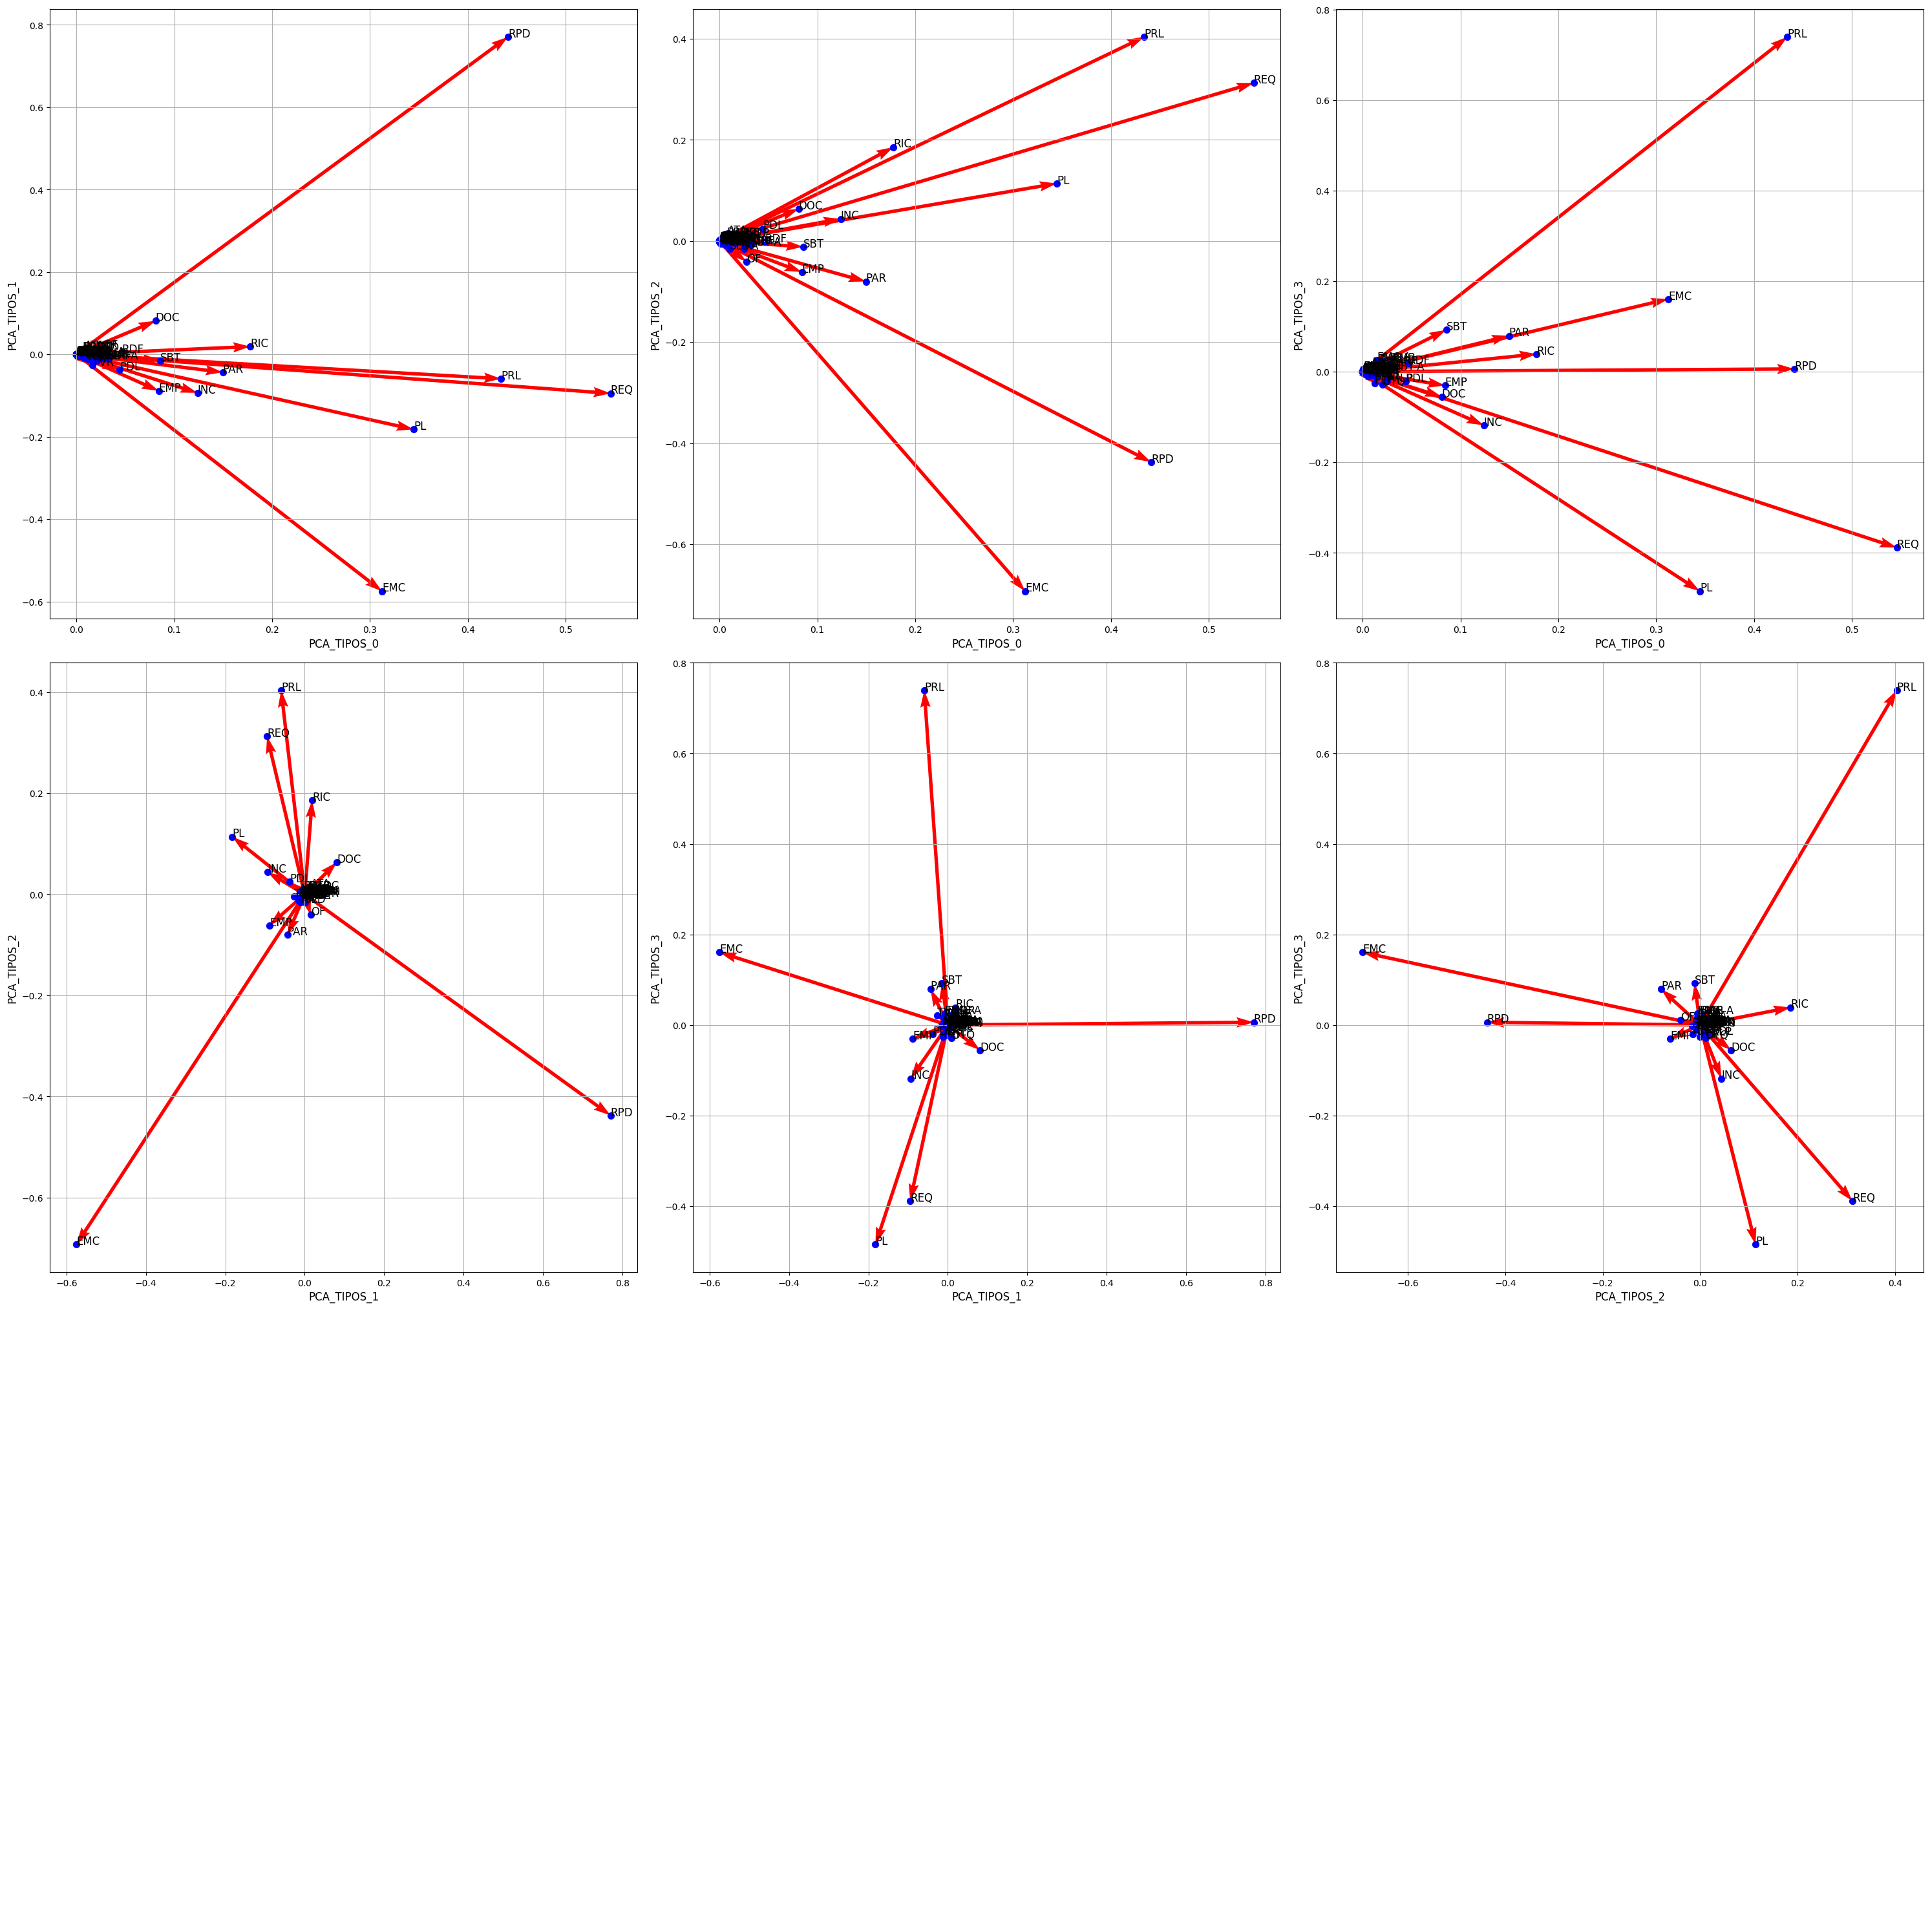

In [98]:
def plot_biplot(ax, df, col1, col2):
    """Plots a biplot on a given axes object."""
    
    x = df[col1]
    y = df[col2]
    labels = df['temas']

    ax.quiver(np.zeros(len(x)), np.zeros(len(y)), x, y, angles='xy', scale_units='xy', scale=1, color='r')

    for i, txt in enumerate(labels):
        ax.annotate(txt, (x[i], y[i]), fontsize=12, textcoords='offset points', xytext=(0, 0)) #

    ax.scatter(x, y, color='b', s=50)

    ax.set_xlabel(col1, fontsize=12)
    ax.set_ylabel(col2, fontsize=12)
    # ax.set_title(f'Biplot of {col1} vs. {col2}', fontsize=14)
    ax.grid(True)

# Determine the number of plots (combinations of columns)
num_cols = len(df_cargas.columns)
num_plots = num_cols * (num_cols - 1) // 2  # We only need the lower triangular part of the combinations

# Calculate the grid dimensions (square root to get close to a square layout)
grid_size = int(np.ceil(np.sqrt(num_plots)))

# Create the figure and axes
fig, axs = plt.subplots(grid_size, grid_size, figsize=(30, 30))
axs = axs.flatten()  # Flatten the axes array for easy iteration

# Plot the biplots
df = df_cargas.reset_index()
plot_index = 0
for col1 in df_cargas.columns:
    for col2 in df_cargas.columns:
        if col1 >= col2:  # Skip the diagonal and upper triangular part
            continue
        
        plot_biplot(axs[plot_index], df, col1, col2)
        plot_index += 1

# Hide any unused axes
for i in range(plot_index, len(axs)):
    axs[i].axis('off')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


## Rename based on the analysis

- PCA_TIPOS_0: Iniciativas e Deliberações: This component seems to be primarily driven by Requerimentos (REQ), which are requests for information or action, and Projetos de Lei (PL), which are proposals for new laws. This suggests a component related to initiating and shaping legislative actions.
- PCA_TIPOS_1: Controle da Agenda e Tramitação: This component is heavily influenced by Requerimentos de Retirada de Pauta (RPD), which are requests to remove items from the agenda. This indicates a component related to the procedural aspects of controlling the legislative agenda and the flow of propositions.
- PCA_TIPOS_2: Emendas e Avaliação Técnica: This component has high loadings for Emendas na Comissão (EMC) and Parecer do Relator (PRL). Emendas are modifications to bills, and Pareceres do Relator are technical analyses. This suggests a component related to the detailed review and amendment of propositions.
- PCA_TIPOS_3: Análise e Tomada de Decisão: This component is strongly associated with Parecer do Relator (PRL), which indicates a focus on the technical evaluation and decision-making process for propositions. The negative loading for Requerimentos (REQ) and Projetos de Lei (PL) suggests that this component might represent a counterpoint to the initial proposition and initiation phase.

In [9]:
rename_dict = {
    "PCA_TIPOS_0": "Iniciativas e Deliberações",
    "PCA_TIPOS_1": "Controle da Agenda e Tramitação",
    "PCA_TIPOS_2": "Emendas e Avaliação Técnica",
    "PCA_TIPOS_3": "Análise e Tomada de Decisão",
}

In [10]:
df_pca_renamed = df_pca.rename(rename_dict, axis=1)

In [11]:
df_pca_renamed.to_csv('./output/pca/df_pca_tipos.csv')